## SVM (Support Vector Machine)

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [34]:
df = pd.read_csv('dataset_final_para_modelo.csv', decimal=',')
y = df['Sinistro']
X = df.drop(columns=['Sinistro', 'data'])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state= 8
)

print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")

Tamanho do conjunto de treino: (17196, 15)
Tamanho do conjunto de teste: (7371, 15)


### 'tipo_via' possui valores Nan, lidaremos com uma estratégia de preenchimento por moda

In [36]:
imputer = SimpleImputer(strategy='most_frequent')

# Aprender a moda no treino e transformar treino e teste
X_train['tipo_via_num'] = imputer.fit_transform(X_train[['tipo_via_num']]).reshape(-1)
X_test['tipo_via_num'] = imputer.transform(X_test[['tipo_via_num']]).reshape(-1)

# Verificar se ainda há NaNs
print(X_train.isnull().sum())
print(X_test.isnull().sum())

latitude                     0
longitude                    0
dia_semana                   0
mes                          0
is_weekend                   0
hora                         0
Chuva                        0
tipo_via_num                 0
tp_veiculo_bicicleta         0
tp_veiculo_caminhao          0
tp_veiculo_motocicleta       0
tp_veiculo_nao_disponivel    0
tp_veiculo_onibus            0
tp_veiculo_outros            0
tp_veiculo_automovel         0
dtype: int64
latitude                     0
longitude                    0
dia_semana                   0
mes                          0
is_weekend                   0
hora                         0
Chuva                        0
tipo_via_num                 0
tp_veiculo_bicicleta         0
tp_veiculo_caminhao          0
tp_veiculo_motocicleta       0
tp_veiculo_nao_disponivel    0
tp_veiculo_onibus            0
tp_veiculo_outros            0
tp_veiculo_automovel         0
dtype: int64


In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [38]:
model = SVC(
    C=1.0, # Trade-off entre maximizar a margem e minimizar erros de classificação
    kernel='rbf',        
    gamma='scale',       
    class_weight='balanced', # Para lidar com desbalanceamento
    probability=True, # Para permitir predict_proba
    random_state=8
)
model.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [39]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1] # Probabilidade de acidente


--- Matriz de Confusão ---


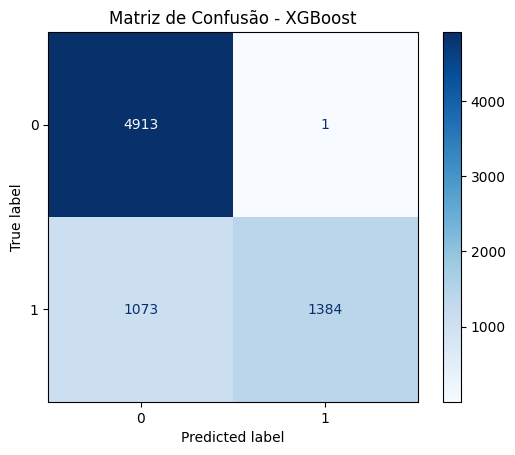

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      4914
           1       1.00      0.56      0.72      2457

    accuracy                           0.85      7371
   macro avg       0.91      0.78      0.81      7371
weighted avg       0.88      0.85      0.84      7371

--- AUC (XGBoost) ---
0.8336


In [40]:
print("\n--- Matriz de Confusão ---")
cf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cf_matrix).plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - XGBoost")
plt.show()

print(classification_report(y_test, y_pred))

auc_xgb = roc_auc_score(y_test, y_proba)
print(f"--- AUC (XGBoost) ---")
print(f"{auc_xgb:.4f}")